### Imports

In [2]:
import datetime
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
 
## for explainer
from lime import lime_tabular
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
    
## plot style and warnings    
plt.style.use('ggplot')
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')

### Import of the database and visualizations

In [3]:
df = pd.read_csv('final.csv', sep=',')

In [3]:
df.shape

(12708, 16)

In [4]:
df.head()

,Sets,Seasons_Encoded,GameRoundFases_Encoded,Encoded_Age_Difference_Interval,Encoded_Ranking_Difference_Interval,Encoded_Height_Difference_Interval,TieBreak,Tournament_Encoded,PlayerName_RecentPerformance_Encoded,Oponent_RecentPerformance_Encoded,H2H_Encoded,TimeDifference_Interval_Encoded,Present_Prize,Prize_Intervals_Encoded,PointDiff,Age_Difference
0,2,0,1,1,1,1,0,2,1,1,0,3,3456652.8,5,1,5.0
1,2,0,0,1,1,1,0,3,1,1,0,1,5370745.6,5,0,5.0
2,2,0,1,1,1,1,0,2,1,1,0,2,3200601.6,5,1,2.0
3,2,0,0,4,1,1,0,3,1,1,0,1,4661712.0,5,0,9.0
4,2,0,1,1,1,1,0,3,1,1,0,1,4661712.0,5,0,2.0


In [4]:
# Map 'Sets' to binary values of 0 and 1
df['Sets'] = df['Sets'].map({2: 0, 3: 1})

In [5]:
# Calculate absolute frequency
absolute_freq = df['Sets'].value_counts()

# Calculate relative frequency
relative_freq = df['Sets'].value_counts(normalize=True)

# Print absolute frequency
print('Absolute Frequency:')
print(absolute_freq)

# Print relative frequency
print('Relative Frequency:')
print(relative_freq)

Absolute Frequency:
0    9217
1    3491
Name: Sets, dtype: int64
Relative Frequency:
0    0.725291
1    0.274709
Name: Sets, dtype: float64


A partir deste output podemos observar que a base de dados se encontra muito desbalanceada. 

De seguida vamos fazer modelos com a base de dados original, e vamos também tentar corrigir o probelma do desbalanceamento dos dados. Para existo existem algumas formas de o fazer:
- Stratified Sampling
- Oversampling
- Undersampling

## **Correlations**

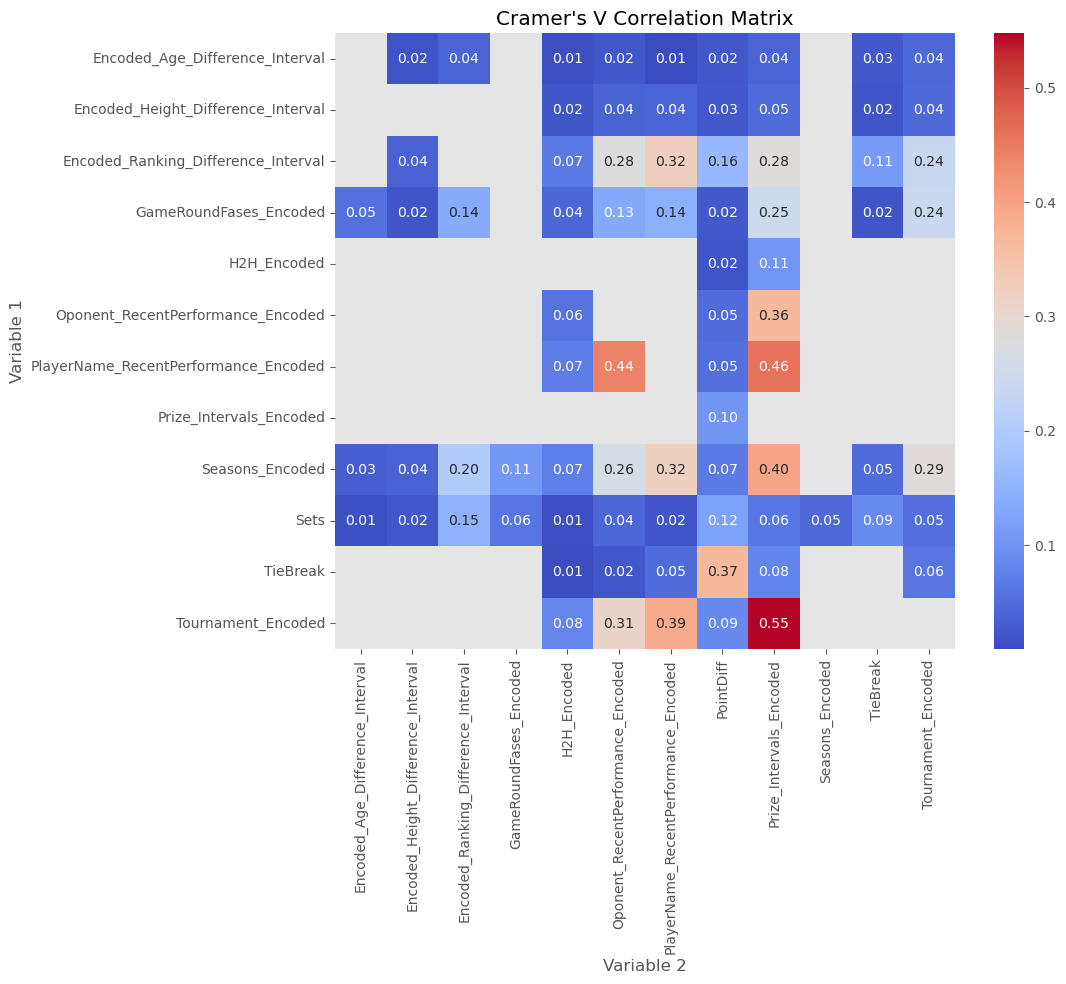

In [27]:
# Create a subset DataFrame with the categorical variables
categorical_cols = ['Sets', 
                    'Seasons_Encoded', 
                    'GameRoundFases_Encoded',
                    'Encoded_Age_Difference_Interval',
                    'Encoded_Ranking_Difference_Interval',
                    'Encoded_Height_Difference_Interval', 
                    'TieBreak', 
                    'Tournament_Encoded',
                    'PlayerName_RecentPerformance_Encoded',
                    'Oponent_RecentPerformance_Encoded', 
                    'H2H_Encoded',
                    'Prize_Intervals_Encoded',
                    'PointDiff']

subset_df = df[categorical_cols]

# Calculate Cramer's V values
cramer_v_values = []
for i in range(len(subset_df.columns)):
    for j in range(i+1, len(subset_df.columns)):
        contingency_table = pd.crosstab(subset_df.iloc[:, i], subset_df.iloc[:, j])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        phi = np.sqrt(chi2 / n)
        r, k = contingency_table.shape
        cramers_v = phi / np.sqrt(min(r - 1, k - 1))
        cramer_v_values.append((subset_df.columns[i], subset_df.columns[j], cramers_v))

# Create a DataFrame with the Cramer's V values
cramer_v_df = pd.DataFrame(cramer_v_values, columns=['Variable 1', 'Variable 2', "Cramer's V"])

# Create a pivot table for the heatmap
heatmap_data = cramer_v_df.pivot('Variable 1', 'Variable 2', "Cramer's V")

# Plot the Cramer's V correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Cramer's V Correlation Matrix")
plt.show()

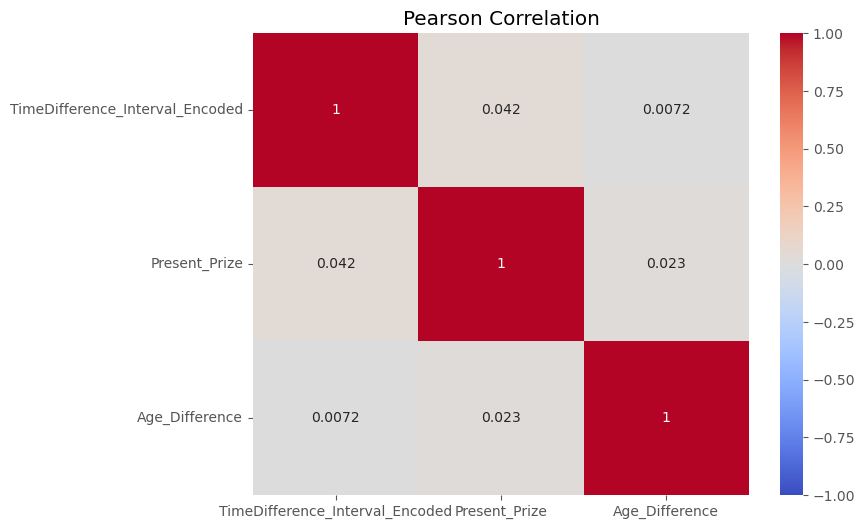

In [29]:
subset_df = df[['TimeDifference_Interval_Encoded', 
               'Present_Prize',
               'Age_Difference']]

# Calculate the Pearson correlation coefficients
correlation_matrix = subset_df.corr(method='pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation")
plt.show()

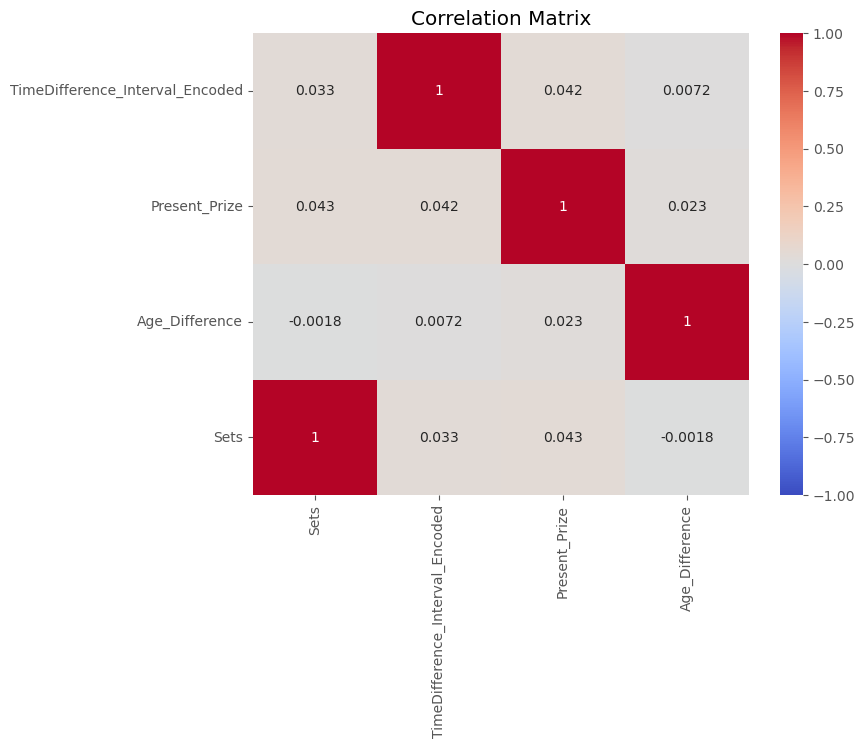

In [31]:
subset_df = df[['Sets',
                'TimeDifference_Interval_Encoded', 
               'Present_Prize',
               'Age_Difference']]

# Calculate the correlations
correlation_matrix = subset_df.corr()

# Move "Sets" to the first row of the correlation matrix
sets_corr = correlation_matrix["Sets"].copy()
correlation_matrix = correlation_matrix.drop("Sets", axis=0)
correlation_matrix = correlation_matrix.append(sets_corr)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## Stratified Sampling, Oversampling e Undersampling

### **Stratified Sampling**

Stratified sampling is a sampling technique where the data is divided into subgroups (strata) based on the target variable's class labels. The goal is to ensure that each subgroup has a representative proportion of samples from each class. When splitting the data into training and testing sets, stratified sampling ensures that the class distribution is maintained in both sets.

#### Random Forest

Accuracy: 0.6821400472069237
Confusion Matrix:
[[1653  191]
 [ 617   81]]


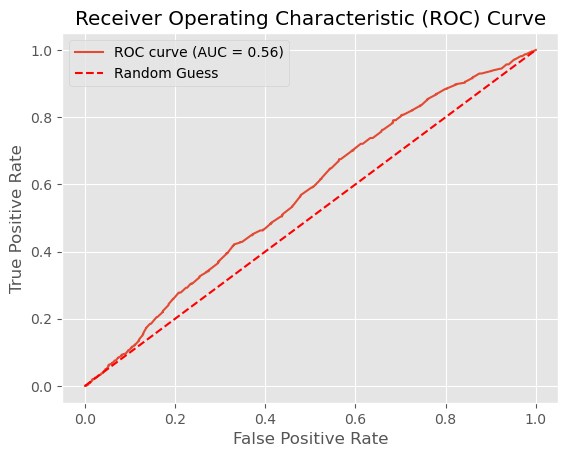

In [49]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create a Random Forest classifier and fit the model on the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### KNN

Accuracy: 0.6762391817466562
Confusion Matrix:
[[1619  225]
 [ 598  100]]


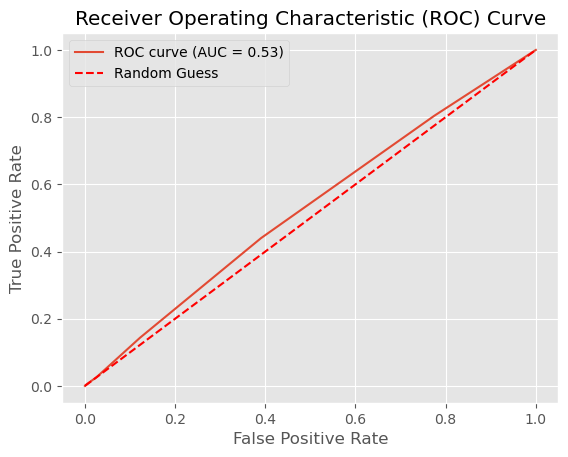

In [32]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Calculate the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Naive Bayes

Accuracy: 0.7061369000786782
Confusion Matrix:
[[1760   84]
 [ 663   35]]


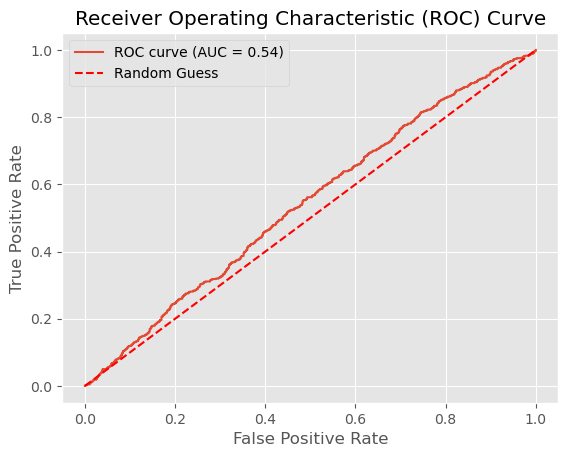

In [43]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Logistic Regression

Accuracy: 0.7254130605822188
Confusion Matrix:
[[1844    0]
 [ 698    0]]


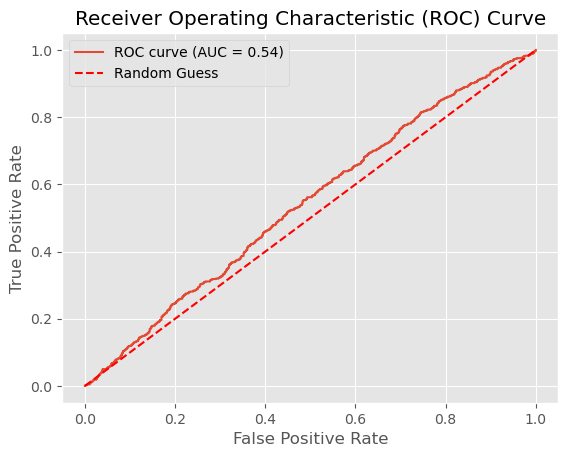

In [47]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### SVM

Accuracy: 0.7254130605822188
Confusion Matrix:
[[1844    0]
 [ 698    0]]


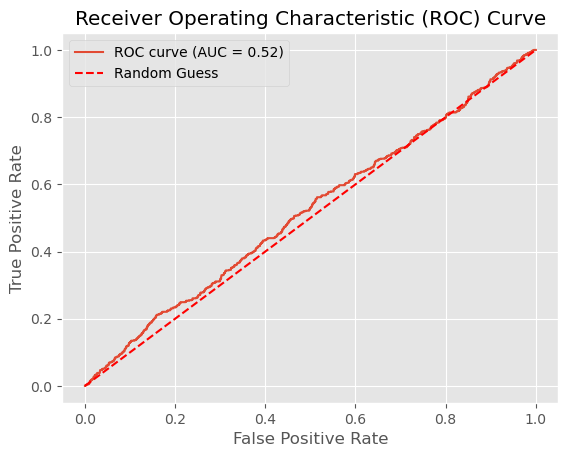

In [44]:
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create the SVM model
svm = SVC(probability=True)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = svm.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### **Oversampling**

Oversampling is a technique used to increase the number of samples in the minority class (the less frequent class) to balance the class distribution. It involves randomly duplicating or generating new synthetic samples from the minority class until it reaches a desired balance with the majority class. Oversampling methods include Random Oversampling, Synthetic Minority Oversampling Technique (SMOTE), and Adaptive Synthetic Sampling (ADASYN).

#### Random Forest

Accuracy: 0.6309992132179386
Confusion Matrix:
[[1402  431]
 [ 507  202]]


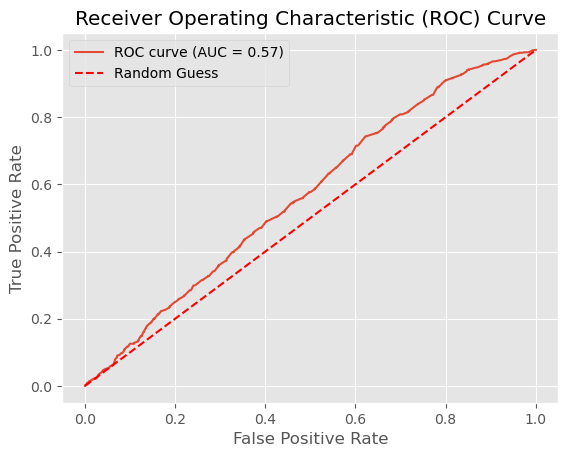

In [52]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest classifier and fit the model on the oversampled training data
model = RandomForestClassifier()
model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### KNN

Accuracy: 0.6884343036978757
Confusion Matrix:
[[1630  203]
 [ 589  120]]


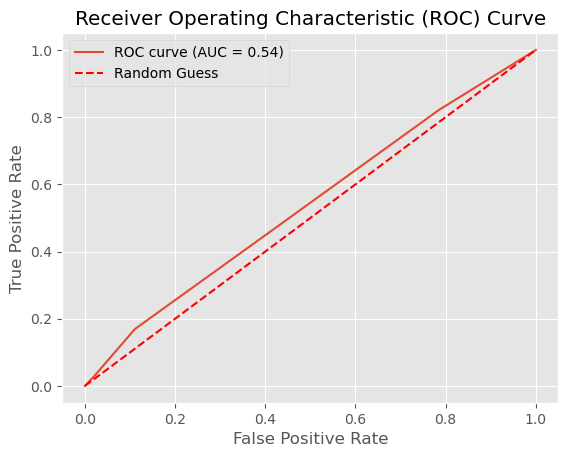

In [53]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Calculate the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Naive Bayes

Accuracy: 0.7143981117230527
Confusion Matrix:
[[1790   43]
 [ 683   26]]


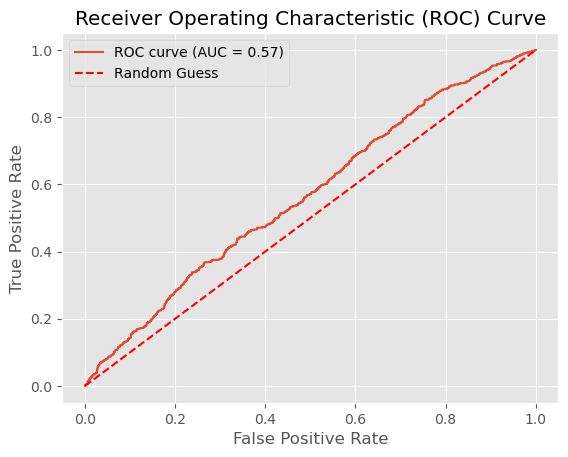

In [54]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Logistic Regression

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


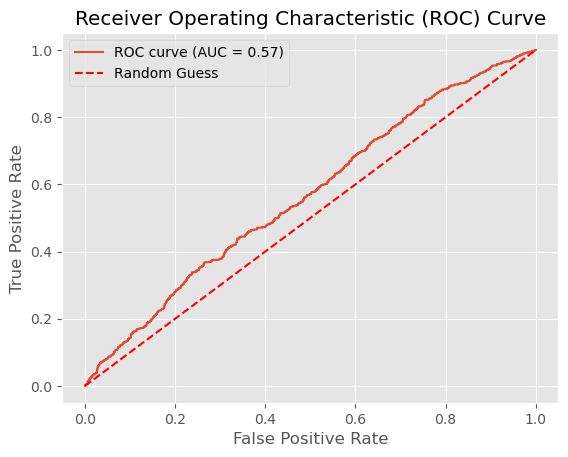

In [56]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### SVM

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


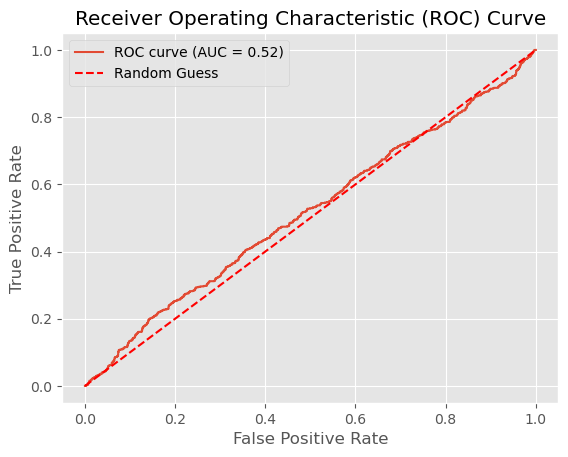

In [57]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create the SVM model
svm = SVC(probability=True)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = svm.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### **Undersampling**

Undersampling is a technique used to reduce the number of samples in the majority class (the more frequent class) to balance the class distribution. It involves randomly removing samples from the majority class until it reaches a desired balance with the minority class. Undersampling methods include Random Undersampling, Tomek Links, and Cluster Centroids.

#### Random Forest

Accuracy: 0.549567269866247
Confusion Matrix:
[[1001  832]
 [ 313  396]]


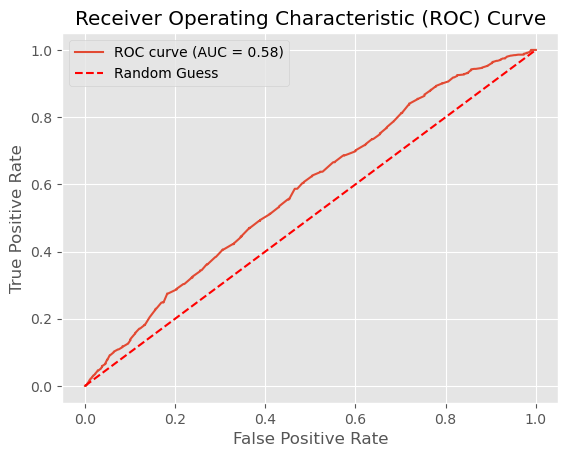

In [60]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create a Random Forest classifier and fit the model on the undersampled training data
model = RandomForestClassifier()
model.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### KNN

Accuracy: 0.6884343036978757
Confusion Matrix:
[[1630  203]
 [ 589  120]]


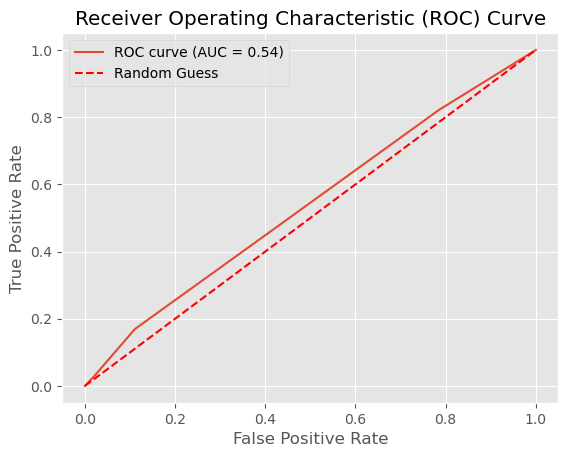

In [63]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Calculate the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Naive Bayes

Accuracy: 0.7143981117230527
Confusion Matrix:
[[1790   43]
 [ 683   26]]


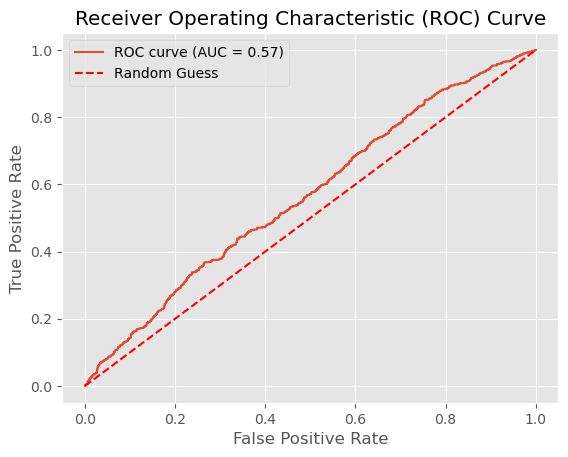

In [64]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Logistic Regression

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


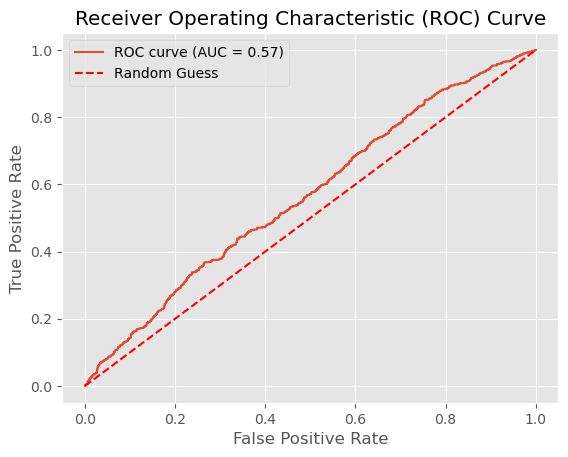

In [65]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### SVM

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


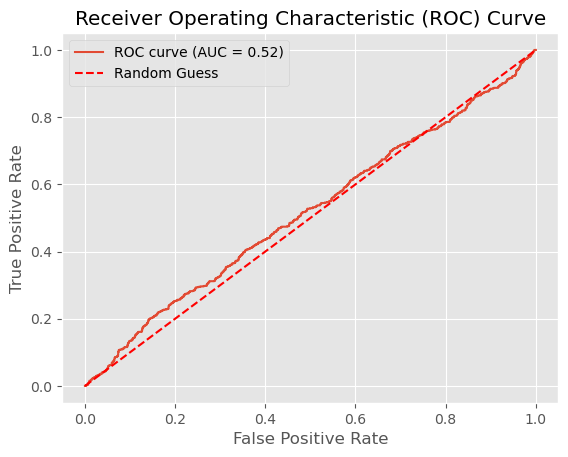

In [66]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create the SVM model
svm = SVC(probability=True)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = svm.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## **Models**

Após serem analizadas as 3 estratégias, chegou-se à conclusão que a solução mais acertada seria a de usar Stratified Sampling.

Iremos então usar o stratified sampling e, testar diferentes variáveis no modelo, e tentar chegar a um modelo ótimo para a previsão dos sets.

### Stratified Sampling

Observando os diferentes resultados, vão ser usados 3 modelos diferentes:
- Random Forest
- KNN
- Naive Bayes

#### Random Forest

Accuracy: 0.6860739575137687
Confusion Matrix:
[[1661  183]
 [ 615   83]]


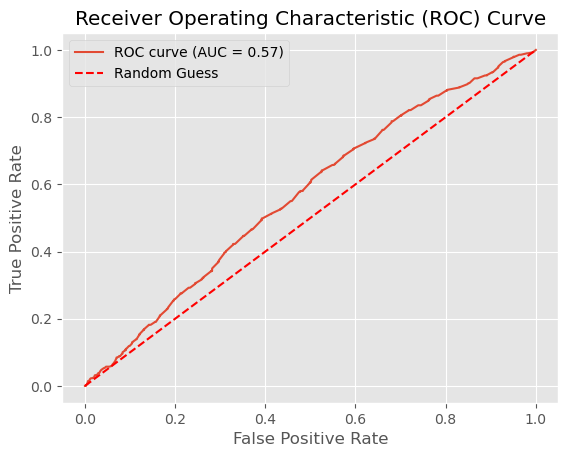

In [6]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create a Random Forest classifier and fit the model on the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### KNN

Accuracy: 0.6762391817466562
Confusion Matrix:
[[1619  225]
 [ 598  100]]


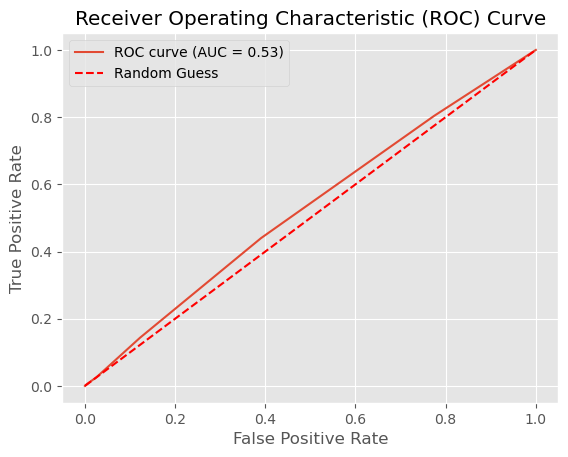

In [10]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Calculate the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Naive Bayes

Accuracy: 0.7061369000786782
Confusion Matrix:
[[1760   84]
 [ 663   35]]


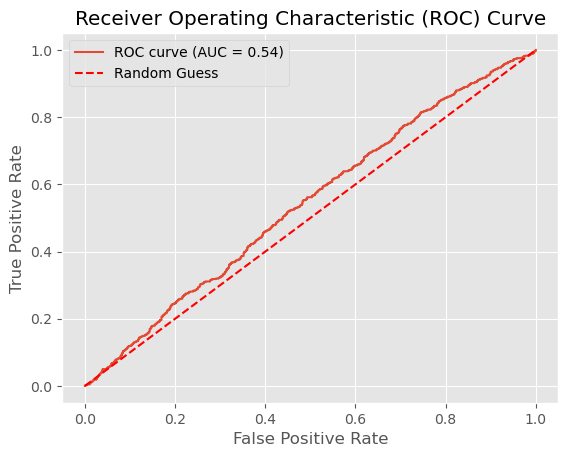

In [11]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Predict probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Escolha de variáveis

Para a escolha das variáveis certas é necessário perceber qual a importância que cada variável tem no modelo, e depois, escolher as variáveis que mais impactam o nosso modelo.

In [13]:
df.columns

Index(['Sets', 'Seasons_Encoded', 'GameRoundFases_Encoded',
       'Encoded_Age_Difference_Interval',
       'Encoded_Ranking_Difference_Interval',
       'Encoded_Height_Difference_Interval', 'TieBreak', 'Tournament_Encoded',
       'PlayerName_RecentPerformance_Encoded',
       'Oponent_RecentPerformance_Encoded', 'H2H_Encoded',
       'TimeDifference_Interval_Encoded', 'Present_Prize',
       'Prize_Intervals_Encoded', 'PointDiff', 'Age_Difference'],
      dtype='object')

Iremos então observar, para cada modelo, quais as variáveis que têm mais importância e testar esses modelos apenas com as variáveis mais relevantes.

#### Random Forest

##### **Importância das variáveis**

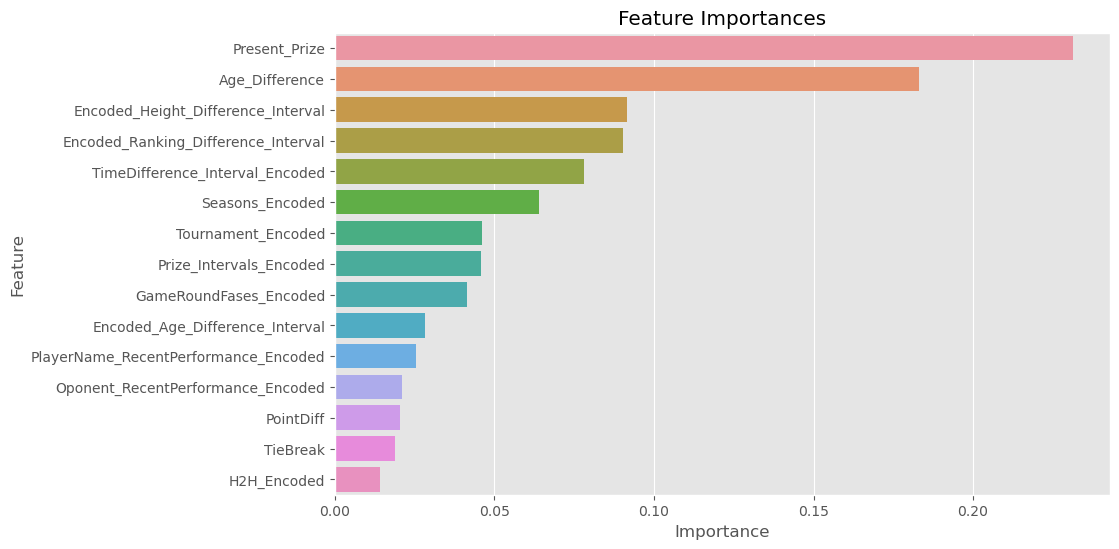

                                 Feature  Importance
11                         Present_Prize    0.231326
14                        Age_Difference    0.183082
4     Encoded_Height_Difference_Interval    0.091613
3    Encoded_Ranking_Difference_Interval    0.090389
10       TimeDifference_Interval_Encoded    0.078144
0                        Seasons_Encoded    0.063872
6                     Tournament_Encoded    0.045997
12               Prize_Intervals_Encoded    0.045636
1                 GameRoundFases_Encoded    0.041463
2        Encoded_Age_Difference_Interval    0.028347
7   PlayerName_RecentPerformance_Encoded    0.025542
8      Oponent_RecentPerformance_Encoded    0.021067
13                             PointDiff    0.020531
5                               TieBreak    0.018894
9                            H2H_Encoded    0.014096


In [7]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the feature importances in a table
print(feature_importances)

##### **Tests**

##### **Modelo**

Foi criado um novo dataframe com as variáveis cujo o valor de importância era superior a 0.05

In [8]:
df_rf = df[['Sets', 
            'H2H_Encoded',
            'Oponent_RecentPerformance_Encoded',
            'TieBreak',
            'PointDiff',
            'PlayerName_RecentPerformance_Encoded',
            'Encoded_Age_Difference_Interval', 
            'Tournament_Encoded',
            'Prize_Intervals_Encoded',
            'GameRoundFases_Encoded',
            'Encoded_Age_Difference_Interval'
           ]]

In [9]:
df_rf.shape

(12708, 11)

Accuracy: 0.7092840283241542
Confusion Matrix:
[[1749   95]
 [ 644   54]]


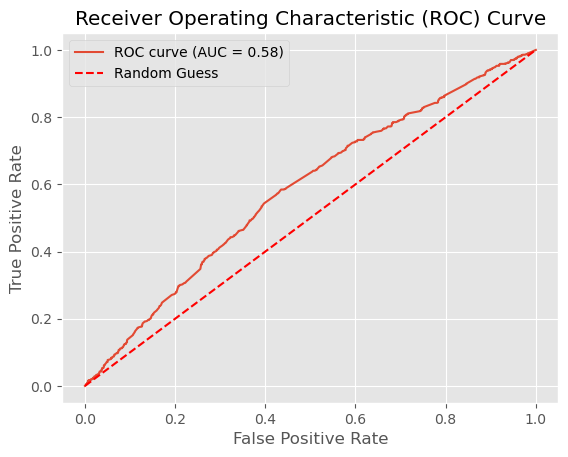

In [10]:
# Split the data into features (X) and the target variable (y)
X = df_rf.drop('Sets', axis=1)
y = df_rf['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create a Random Forest classifier and fit the model on the training data
model_opt = RandomForestClassifier()
model_opt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_opt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model_opt.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### KNN

##### **Importância das variáveis**

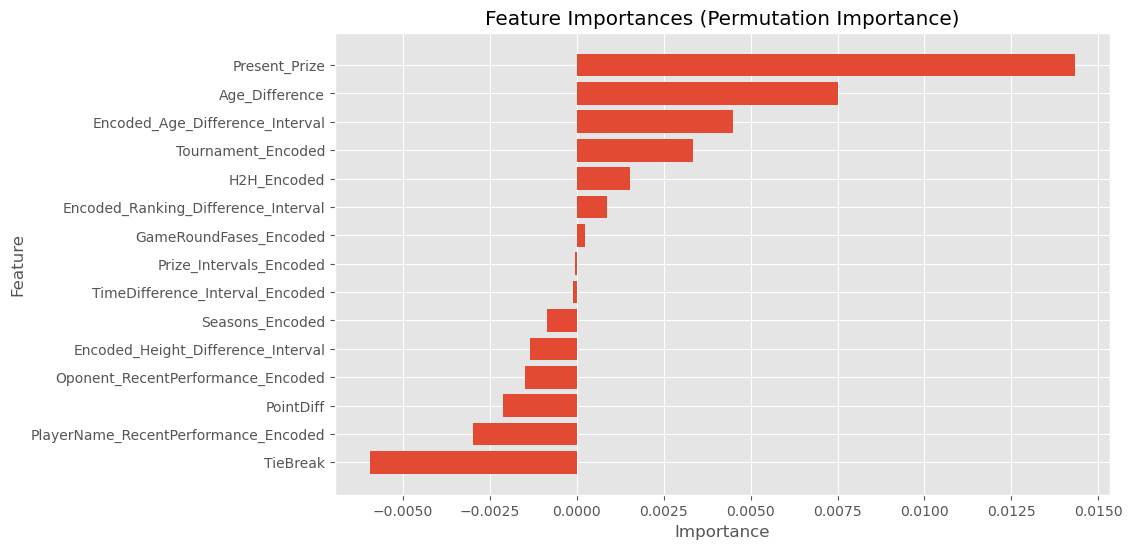

                                 Feature  Importance
0                               TieBreak   -0.005940
1   PlayerName_RecentPerformance_Encoded   -0.002990
2                              PointDiff   -0.002124
3      Oponent_RecentPerformance_Encoded   -0.001495
4     Encoded_Height_Difference_Interval   -0.001338
5                        Seasons_Encoded   -0.000865
6        TimeDifference_Interval_Encoded   -0.000118
7                Prize_Intervals_Encoded   -0.000039
8                 GameRoundFases_Encoded    0.000236
9    Encoded_Ranking_Difference_Interval    0.000865
10                           H2H_Encoded    0.001534
11                    Tournament_Encoded    0.003344
12       Encoded_Age_Difference_Interval    0.004485
13                        Age_Difference    0.007514
14                         Present_Prize    0.014319


In [21]:
# *Para o KNN*
from sklearn.inspection import permutation_importance

# Calculate permutation importances
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importances and their indices
importances = result.importances_mean
indices = np.argsort(importances)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), X_test.columns[indices])
plt.title('Feature Importances (Permutation Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the feature importances in a table
importance_table = pd.DataFrame({'Feature': X_test.columns[indices], 'Importance': importances[indices]})
print(importance_table)

##### **Modelo**

#### Naive Bayes

##### **Importância das variáveis**

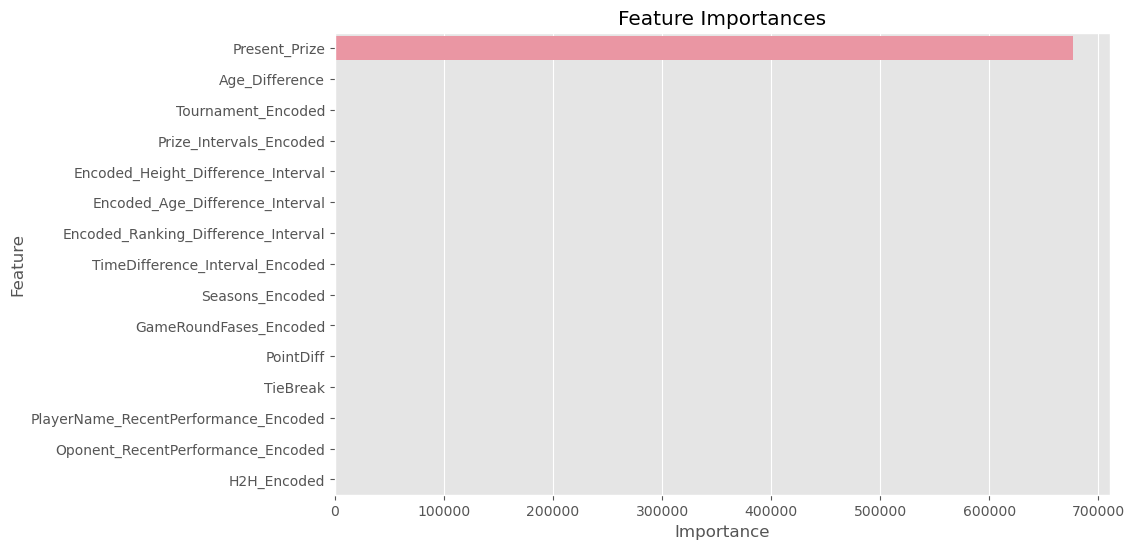

                                 Feature     Importance
11                         Present_Prize  676728.050983
14                        Age_Difference       4.310991
6                     Tournament_Encoded       2.785752
12               Prize_Intervals_Encoded       2.516969
4     Encoded_Height_Difference_Interval       2.008979
2        Encoded_Age_Difference_Interval       1.793077
3    Encoded_Ranking_Difference_Interval       1.678807
10       TimeDifference_Interval_Encoded       1.190693
0                        Seasons_Encoded       0.988568
1                 GameRoundFases_Encoded       0.403439
13                             PointDiff       0.293034
5                               TieBreak       0.239239
7   PlayerName_RecentPerformance_Encoded       0.205244
8      Oponent_RecentPerformance_Encoded       0.145742
9                            H2H_Encoded       0.050065


In [18]:
# *Para o Naive Bayes*

# Get the class conditional probabilities
class_conditional_probs = naive_bayes.theta_

# Calculate the average class conditional probabilities for each feature
feature_importances = np.mean(class_conditional_probs, axis=0)

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the feature importances in a table
print(feature_importances)

##### **Modelo**

### Models meus

Confusion Matrix:
[[9217    0]
 [3491    0]]


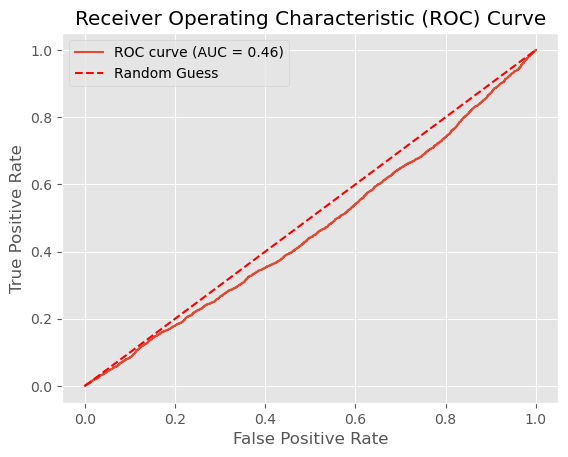

In [24]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Instantiate your model
model = LogisticRegression()

# Define the number of folds for cross-validation
num_folds = 5

# Create the cross-validation object
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get predicted probabilities
y_pred_proba_cv = cross_val_predict(model, X, y, cv=cv, method='predict_proba')

# Get the predicted class labels
y_pred_cv = cross_val_predict(model, X, y, cv=cv)

# Calculate the confusion matrix
cm = confusion_matrix(y, y_pred_cv)
print("Confusion Matrix:")
print(cm)

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_pred_proba_cv[:, 1])
auc_score = roc_auc_score(y, y_pred_proba_cv[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Vamos aplicar diferentes formas de balancear os dados sempre com os mesmos 3 modelos:
- Random Forest
- KNN
- Naive Bayes
- Logistic Regression
- SVM

### Stratified Sampeling

Accuracy: 0.6845003933910306
Confusion Matrix:
[[1668  176]
 [ 626   72]]


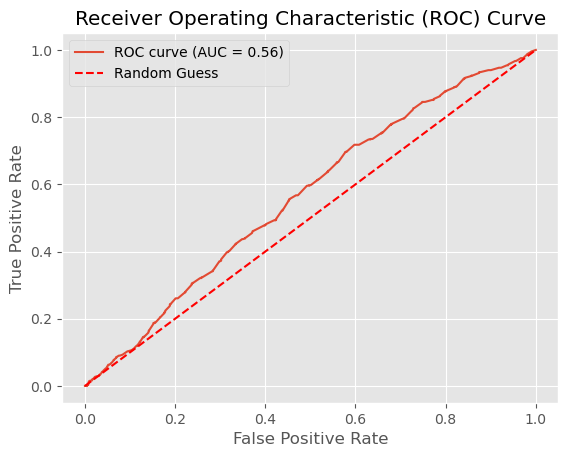

In [25]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now you have the stratified train and test sets
# You can proceed with your modeling and evaluation steps

# Create a Random Forest classifier and fit the model on the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [66]:
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.68
Auc: 0.57
Recall (all 1s predicted right): 0.12
Precision (confidence when predicting a 1): 0.32
Detail:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80      2757
           1       0.32      0.12      0.17      1056

    accuracy                           0.68      3813
   macro avg       0.52      0.51      0.49      3813
weighted avg       0.61      0.68      0.63      3813



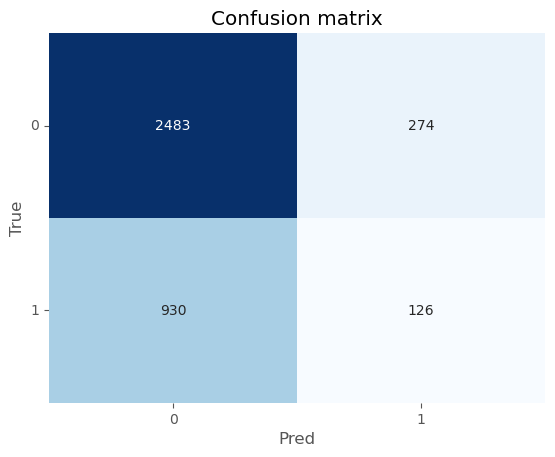

In [68]:
### confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, y_pred, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

Accuracy: 0.6963021243115657
Confusion Matrix:
[[1679  154]
 [ 618   91]]


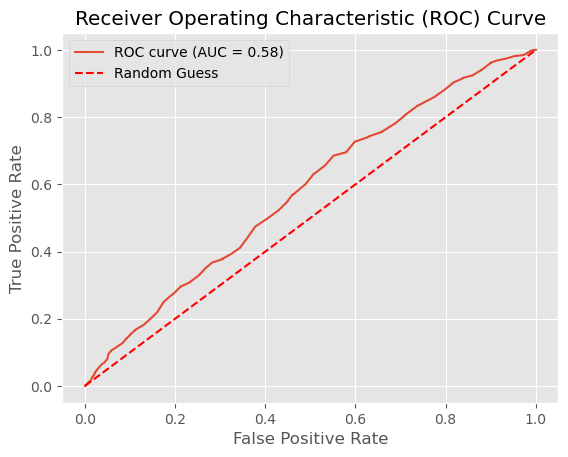

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler

# Split the data into features (X) and the target variable (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Overfitting
oversampler = RandomOverSampler(random_state=42)

# Create a Random Forest classifier and fit the model on the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [9]:
# Calculate absolute frequency
absolute_freq = y_train.value_counts()

# Calculate relative frequency
relative_freq = y_train.value_counts(normalize=True)

# Print absolute frequency
print('Absolute Frequency:')
print(absolute_freq)

# Print relative frequency
print('Relative Frequency:')
print(relative_freq)

Absolute Frequency:
0    7384
1    2782
Name: Sets, dtype: int64
Relative Frequency:
0    0.726343
1    0.273657
Name: Sets, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.6766325727773407
Confusion Matrix:
[[1595  238]
 [ 584  125]]


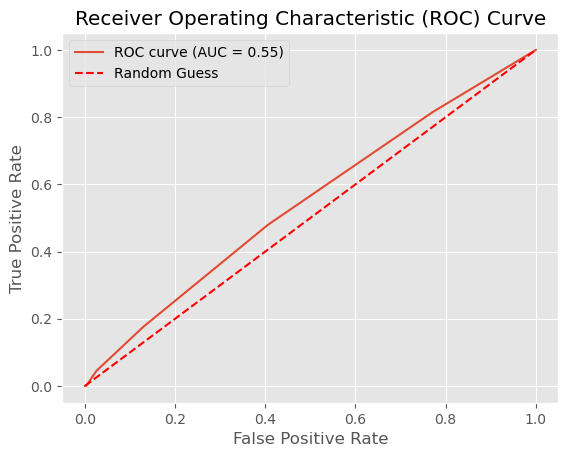

In [16]:
# Calculate the predicted probabilities for the positive class
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model to the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.7147915027537373
Confusion Matrix:
[[1766   67]
 [ 658   51]]


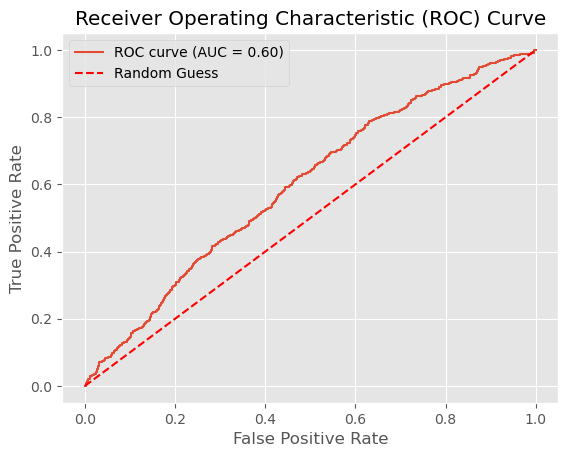

In [18]:
# Calculate the predicted probabilities for the positive class
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Split the data into features (X) and target (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


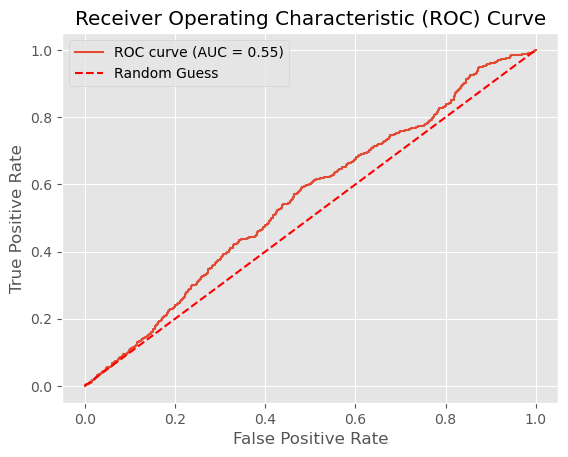

In [22]:
# Calculate the predicted probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Split the data into features (X) and target (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.7210857592446892
Confusion Matrix:
[[1833    0]
 [ 709    0]]


In [10]:
# Split the data into features (X) and target (y)
X = df.drop('Sets', axis=1)
y = df['Sets']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## call model
model = ensemble.GradientBoostingClassifier()

## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model / taxa de aprendizagem (entre 0 e 1 - quão depressa ele está a aprender Quanto maior mais rápido escorrega para o valor óptimo)
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model / nº de estimadores- nºde árvores a ligar/usar no modelo
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.

## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=20, 
       scoring="accuracy").fit(X_train, y_train)

print("Best Model parameters:", random_search.best_params_)  #valor dos melhores parâmetros
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

Best Model parameters: {'subsample': 1, 'n_estimators': 1000, 'min_samples_split': 60, 'min_samples_leaf': 9, 'max_features': 6, 'max_depth': 3, 'learning_rate': 0.005}
Best Model mean accuracy: 0.7266379565101102


In [14]:
## utilizando o modelo selecionado pelo Random Search "model"

## train the model
model.fit(X_train, y_train)

## test the model
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)

In [15]:
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy (overall correct predictions): 0.72
Auc: 0.68
Recall (all 1s predicted right): 0.01
Precision (confidence when predicting a 1): 0.47
Detail:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1833
           1       0.47      0.01      0.02       709

    accuracy                           0.72      2542
   macro avg       0.59      0.50      0.43      2542
weighted avg       0.65      0.72      0.61      2542

